<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_04_Aggregates_Subqueries_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aggregate Functions and Subqueries With Goodreads Data
### Brendan Shea, PhD

In our last chapter, you learned the basics of SQL. You learned to use SELECT, FROM, WHERE, LIKE, ORDER BY, and LIMIT clauses to navigate a data universe. You asked questions to your database, and it responded. In this chapter, we'll explore SQL in more depth, focusing on aggregate functions and subqueries. In the process, you will uncover the deeper capabilities of Structured Query Language (SQL), finding yourself evolving from a database enthusiast to a capable data wrangler. With this newfound knowledge, you'll be able to retrieve insightful data, analyze complex patterns, and explore the unknowns hidden in your datasets.

This chapter introduces you to the dataset of Science Fiction books from Goodreads. We will dissect this dataset, identifying various data types and understanding the concept of null values. As data scientists, we will also reflect on the purpose of our data, setting the stage for more complex queries.

As we advance, you'll be introduced to the magic of aggregate functions. COUNT, SUM, MIN, MAX, AVG---these are not just random words but powerful spells that will let you crunch numbers, identify trends, and answer questions you never thought a database could resolve. You'll learn how to count books, sum ratings, find the highest or lowest value in a column, and compute average scores.

Next, we'll delve into grouping data using the GROUP BY clause. Imagine sorting the universe of Sci-Fi books by author, publication year, or average rating. With GROUP BY, you can see patterns and trends in your data subsets, making extracting meaning and insights easier.  We'll explore further with the HAVING clause, filtering groups to narrow down our data galaxy to only the most intriguing constellations. This will allow us to answer more specific questions and perform more detailed analysis.

As we approach the end of our chapter, prepare to dive deep into the world of subqueries. A query within a query might sound complex, but fear not! We'll break it down into manageable pieces, showing you how to use subqueries in SELECT, FROM, and WHERE statements. With this powerful tool in your SQL toolkit, there are no limits to the questions you can ask your data.

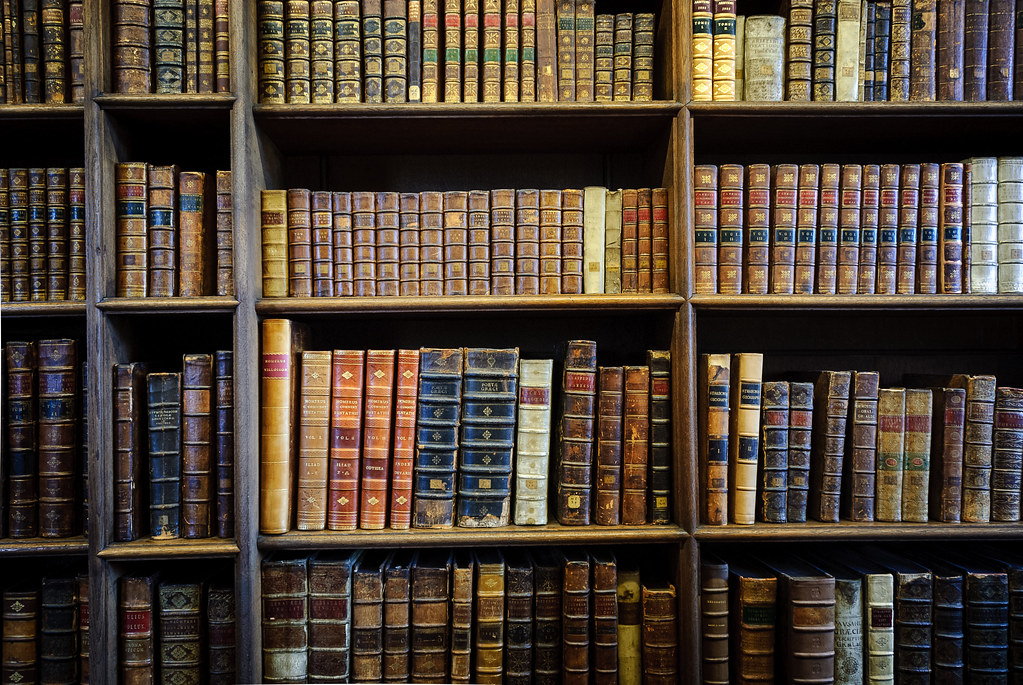

## Brendan's Lecture
You can click the cell to launch my lecture.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kNj4YplHZcA', width=1000, height=600)

## Why Sites Like Goodreads Use Databases
IN this lesson, we'll be using (publicly available) information released by the Amazon-owned Goodreads (https://www.goodreads.com). This is a popular book review and recommendation platform with millions of users worldwide. It serves as a rich source of book-related data, offering details such as book titles, author names, publication dates, ratings, reviews, and much more. But why and how does Goodreads, and by extension its users, benefit from using databases?

At its core, Goodreads is a data-driven platform. It provides readers with personalized book recommendations, allows users to track their reading, and enables them to discover new books based on their preferences and those of similar users. None of this would be possible without a robust and efficient data management system. That's where databases come in.

A database allows Goodreads to efficiently store, retrieve, and manipulate vast amounts of data. Here are a few specific ways in which Goodreads benefits from using a database:

1.  Data Organization: Databases provide structured storage for the immense amount of data that Goodreads deals with. For example, the information about books (like title, author, publisher, etc.) can be stored in one table, while user data (such as user ID, name, reading history, etc.) can be stored in another. This structured organization allows for efficient data retrieval and management.

2.  Scalability: As the Goodreads user base grows, so does the amount of data it needs to handle. Databases are designed to manage large volumes of data and can be scaled up as needed. This allows Goodreads to support its growing user base without compromising on performance or efficiency.

3.  Data Integrity: Databases also ensure data integrity, meaning that the data remains accurate and consistent across the platform. This is crucial for maintaining user trust and providing reliable book recommendations.

4.  Data Security: User data, including personal details and reading histories, needs to be stored securely. Databases provide mechanisms to protect this data, including access controls, backups, and encryption.

5.  Querying Capabilities: Databases allow complex queries to be executed on the data. This is how Goodreads can provide personalized book recommendations, find similar books, or allow users to search for books based on various criteria.

From the perspective of users, the use of databases by Goodreads enhances their experience on the platform. It enables them to browse through a vast, well-organized library of books, receive personalized recommendations, and connect with other readers seamlessly and efficiently.

In our examples, we're using a small subset of the data that Goodreads might actually use. But even with this small dataset, you can see how SQL and databases allow us to extract useful information and insights, manipulate the data, and generate reports. And remember, the full Goodreads platform would have even more tables and data, giving them a lot more to work with and a lot more power to provide useful features for their users.

## The Sci_Fi_Books Table

Our database of science fiction books, represented as a single table called "books," consists of several fields each representing a different facet of information about a book. Let's decode the structure:

-   `firstPublishDate`: The date when the book was first published, represented as a TEXT data type.
-   `publishDate`: The most recent publication date of the book, also a TEXT data type.
-   `title`: The title of the book.
-   `series`: The series the book belongs to, if any.
-   `author`: The author of the book.
-   `rating`: The average Goodreads rating of the book, given as a REAL number (a decimal number).
-   `language`: The language of the book.
-   `pages`: The number of pages in the book, represented as an INT (integer).
-   `publisher`: The name of the publisher.
-   `numRatings`: The total number of ratings the book has received on Goodreads, represented as an INT.
-   `id`: A unique identifier for each book, serving as the PRIMARY KEY for our database.

One of the things you'll notice is that the data is a mix of different types, including TEXT, REAL, and INT. And remember, not every field will have data -- sometimes, there will be null values, which means that no data is available for that particular field for a specific book.

In this chapter, we will embark on a journey to explore this data more thoroughly. We will start by reviewing basic SQL commands and operations, then move onto the powerful aggregate functions like COUNT, SUM, MIN, MAX, and AVG that allow us to extract meaningful insights from data. We will also dive into how to organize and filter data using GROUP BY and HAVING.

## Loading the Sci_Fi_Books Data

Since this our first time loading a "real world" data set, we'll walk through it slowly and carefully. While it's necessary to memorize all the steps here, understanding the general process is valuable for anyone who wants to work with data.

The task at hand involves two main steps. First, we want to download a remote file - in this case, a SQLite database file. SQLite is a software library that provides a relational database management system. The lite in SQLite means light weight in terms of setup, database administration, and required resources.

After downloading the file, we will load it into an SQLite database.  By loading the file into a database, we're making it possible to interact with this data using SQL (Structured Query Language).

Now, we can put these things together to download and load our database:

In [ ]:
# Now let's download the file we'll be using for this lab
!wget -N 'https://github.com/brendanpshea/database_sql/raw/main/data/sci_fi_books.db' -q

%load_ext sql
%sql sqlite:///sci_fi_books.db

Let's go through each line of the code now:


2.  `!wget -N 'https://github.com/brendanpshea/database_sql/raw/main/data/sci_fi_books.db' -q`: This line is using the `wget` command, a free utility for non-interactive download of files from the web. It supports HTTP, HTTPS, and FTP protocols, and can retrieve files through HTTP proxies. The `-N` flag tells `wget` to only download files that are newer than what we already have, and `-q` tells `wget` to operate quietly without giving output messages.

3.  `%load_ext sql`: This line is a Jupyter Notebook magic command. In Jupyter, magic commands are prefixed by the `%` character. These are special commands that are not part of the Python programming language, but are enhancements provided by the IPython kernel. This specific command is loading the SQL extension, which lets us write SQL queries directly into our Jupyter cells.

4.  `%sql sqlite:///sci_fi_books.db`: This is establishing a SQLite connection to the `sci_fi_books.db` database. The `%sql` magic command is used to execute SQL commands in Jupyter notebooks. The `sqlite:///` part is specifying the SQLite database we want to connect to. The remaining part `sci_fi_books.db` is the path to the database file. In this case, it's in the same directory as the notebook, so we just provide the file name.

With these steps, we have successfully downloaded a database file from a remote location and loaded it into an SQLite database using a Jupyter notebook running Ubuntu.

## Our First Query: FInd the Most Popular Books
Here is a sample SQL query that fetches the 20 most popular books, assuming popularity is based on the `numRatings` field:

In [ ]:
%%sql
SELECT * FROM books
ORDER BY numRatings DESC
LIMIT 30;

 * sqlite:///sci_fi_books.db
Done.


firstPublishDate,publishDate,title,series,author,rating,language,pages,publisher,numRatings,id
1997-06-26,2003-11-01,Harry Potter and the Sorcerer's Stone,Harry Potter #1,J.K. Rowling,4.47,English,309,Scholastic Inc,7048471,10
None,2008-09-14,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,374,Scholastic Press,6376780,1
1949-06-08,2013-09-03,1984,None,George Orwell,4.19,English,237,Houghton Mifflin Harcourt,3140442,24
2011-04-25,2012-02-28,Divergent,Divergent #1,Veronica Roth,4.19,English,487,Katherine Tegen Books,2906258,8
1937-09-21,2002-08-15,"The Hobbit, or There and Back Again",The Hobbit,J.R.R. Tolkien,4.27,English,366,Houghton Mifflin,2896265,38
None,2007-07-21,Harry Potter and the Deathly Hallows,Harry Potter #7,J.K. Rowling,4.62,English,759,Arthur A. Levine Books / Scholastic Inc.,2811637,22
1999-07-08,2004-05-01,Harry Potter and the Prisoner of Azkaban,Harry Potter #3,J.K. Rowling,4.57,English,435,Scholastic Inc.,2806471,29
1945-08-17,1996-04-28,Animal Farm,None,George Orwell,3.95,English,141,Signet Classics,2740713,3
1998-07-02,1999-06-02,Harry Potter and the Chamber of Secrets,Harry Potter #2,J.K. Rowling,4.43,English,341,Arthur A. Levine Books / Scholastic Inc.,2725847,35
2000-07-08,2002-09-28,Harry Potter and the Goblet of Fire,Harry Potter #4,J.K. Rowling,4.56,English,734,Scholastic,2594622,30


Let's break it down:

-   `SELECT * FROM books`: This part of the query fetches all the columns (`*` denotes all) from the `books` table.

-   `ORDER BY numRatings DESC`: This part sorts the fetched rows based on the `numRatings` column in descending order (`DESC`).

-   `LIMIT 20`: This part limits the output to the top 20 rows after sorting.

This command will output the details of the 20 most popular books in the dataset. Remember that SQL queries end with a semicolon, though it is not always necessary in Jupyter Notebooks.

It's also important to remember that the SQL extension in Jupyter notebooks begins queries with `%%sql` if the SQL statement spans multiple lines, and `%sql` for single line SQL commands.

Now you can take a look at the data returned and analyze the most popular books in this dataset!

### Aggregate Functions

In SQL, an aggregate function performs a calculation on a set of values and returns a single value. This is particularly useful when you need to perform calculations on a group of rows, such as counting the number of rows, calculating the average of a column, or adding up all the values in a column.

Now let's take a look at two important aggregate functions: `COUNT()` and `SUM()` using the `books` table from the `sci_fi_books.db` database.

### COUNT()

The `COUNT()` function in SQL returns the number of rows that match a specified criteria. It's a simple way to find out how many rows (i.e., entries) you have in your table or how many of those rows match a certain condition.

If we want to know the total number of books in our database, we can use the `COUNT()` function. Here's how you would do it:

In [ ]:
# Total books in database
%sql SELECT COUNT(*) FROM books;

 * sqlite:///sci_fi_books.db
Done.


COUNT(*)
6591


The `*` inside the parentheses of `COUNT()` function indicates that we want to count all rows, regardless of whether any of their column values are NULL.

Now, Suppose we want to find out how many books were first published in the year 2000. We would use the `COUNT()` function with a `WHERE` clause:

In [ ]:
# books published in 2000
%sql SELECT COUNT(*) FROM books WHERE publishDate BETWEEN '2000-1-1' AND '2000-12-31';

 * sqlite:///sci_fi_books.db
Done.


COUNT(*)
40


This SQL query will count the number of books in the books table that were published between January 1, 2000 and December 31, 2000.

1. The `SELECT` keyword is used to select data from a table. In this case, we are selecting the `COUNT(*)` column, which will count the number of rows in the table.
2. The `WHERE` keyword is used to filter the data that is returned. In this case, we are filtering the data so that only rows where the publishDate column is between '2000-1-1' and '2000-12-31' are returned.
3. The `BETWEEN` operator is used to compare a value to a range of values. In this case, we are comparing the publishDate column to the values '2000-1-1' and '2000-12-31'.
4. The date formatting in this query is using the **ISO 8601 date standard**. This standard is a widely used format for representing dates and times. The format used in this query is `YYYY-MM-DD`.

### SUM()
The SUM() function in SQL returns the total sum of a numeric column.

For example, if we want to find out the total number of pages across all books, we can use the SUM() function. Here's how:

In [ ]:
# total pages in all books
%sql SELECT SUM(pages) FROM books;

 * sqlite:///sci_fi_books.db
Done.


SUM(pages)
2495231


This query will return the total sum of the pages column, effectively telling us the total number of pages across all books in the database.

Let's say we now want to find out the total number of ratings received by all books of a specific author (such as J.R.R. Tolkien). We could use the SUM() function along with a WHERE clause:

In [ ]:
# total ratings of Tolkien books
%%sql
SELECT SUM(numRatings) FROM books
  WHERE author='J.R.R. Tolkien';

 * sqlite:///sci_fi_books.db
Done.


SUM(numRatings)
8071714


In these examples, remember that `COUNT()` and `SUM()` are ignoring `NULL` values in their respective columns. If a book doesn't have a `PublishDate` or the `pages` or `numRatings` is not set, those books won't be included in the calculations.

## Keeping Things DISTINCT
The `DISTINCT` keyword is used in SQL to eliminate duplicate records from a result set. The `DISTINCT` keyword can be used with expressions, multiple columns, in aggregate functions, etc.

If you consider each row of a result set to be a set of properties (like a book's title, author, number of pages, and so on), then `DISTINCT` ensures that you only get rows with unique combinations of these properties.

### Basic Syntax

```
SELECT DISTINCT column1, column2, ..., columnN
FROM table_name;
```

### Usage with Single Column

For example, if you want to know all the unique authors in the `books` table, you can use the `DISTINCT` keyword as follows:

In [ ]:
%%sql
SELECT DISTINCT author
FROM books
ORDER BY author
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


author
A. Lee Martinez
A. Merritt
A.A. Attanasio
A.C. Crispin
A.C. Weisbecker


In the above query, each row is a separat author. We can compare this to what happens when we leave distinct out:

In [ ]:
%%sql
SELECT author
FROM books
ORDER BY author
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


author
A. Lee Martinez
A. Lee Martinez
A. Merritt
A.A. Attanasio
A.A. Attanasio


### Usage with Aggregate Functions
The `DISTINCT` keyword can also be used with aggregate functions:

In [ ]:
%%sql
SELECT COUNT(DISTINCT author)
FROM books;

 * sqlite:///sci_fi_books.db
Done.


COUNT(DISTINCT author)
2466


This query counts the number of unique authors in the `books` table. By contrast, you should NOT try to count authors like this (since this will count the number of "books"!):

In [ ]:
%%sql
SELECT COUNT(author)
FROM books;

 * sqlite:///sci_fi_books.db
Done.


COUNT(author)
6591


## Using 'AS' for Renaming in SQL

In SQL, the `AS` keyword is used to rename a column or table with an alias. The alias helps make column names more readable. This is especially useful when the column names are long or not very descriptive.

An alias only exists for the duration of the query. Let's take a look at some examples of how to use `AS` in SQL:

### Renaming Column Names

Suppose we are interested in the `firstPublishDate` and `rating` of each book. We can use the `AS` clause to rename these columns in our result set to something more reader-friendly.


In [ ]:
%%sql
SELECT firstPublishDate AS Published,
  rating AS Rating
FROM books
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


Published,Rating
None,4.33
2003-06-21,4.5
1945-08-17,3.95
1956-10-28,4.26
1955-10-20,4.6


### Renaming Aggregated Column

The `AS` keyword becomes particularly useful when we use aggregate functions. The name of an aggregated column will typically be something like `COUNT(*)`, which is not very descriptive. Let's use `AS` to make it more understandable by calling it "Total_Books":

In [ ]:
%sql SELECT COUNT(*) AS Total_Books FROM books;

 * sqlite:///sci_fi_books.db
Done.


Total_Books
6591


### Combining Column Names

We can also use `AS` to combine multiple columns into a single column in the result set. This can be particularly useful when we want to make the output more readable:

In [ ]:
%%sql
SELECT title || ' - ' || author AS 'Book - Author'
FROM books
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


Book - Author
The Hunger Games - Suzanne Collins
Harry Potter and the Order of the Phoenix - J.K. Rowling
Animal Farm - George Orwell
The Chronicles of Narnia - C.S. Lewis
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien


In the query above, the `||` operator concatenates the `title` and `author` columns. The result is a new column named `Book - Author`, which combines each book's title and author.

In general, the `AS` keyword helps make your SQL queries and their results more understandable, both for you and others who might be reading your code or viewing the output.

## Other Aggregate Functions: MIN, MAX, and AVG

In addition to `COUNT` and `SUM`, there are several other commonly used aggregate functions in SQL: `AVG`, `MIN`, `MAX`, and `GROUP BY`. These functions help summarize data in different ways, which can be very useful when you want to extract insights from a large dataset.

###  `AVG` (Average)
 This function returns the average value of a numeric column.

In [ ]:
#average rating across all the books in our database
%%sql
SELECT AVG(rating) AS Average_Rating
FROM books;

 * sqlite:///sci_fi_books.db
Done.


Average_Rating
3.9888848429676864


Note that we can combine this with operators we've learned previously, like `ROUND()`:

In [ ]:
%%sql
SELECT ROUND(AVG(rating), 2) AS Average_Rating
FROM books;

 * sqlite:///sci_fi_books.db
Done.


Average_Rating
3.99


### `MIN` (Minimum)
This function returns the smallest value of the selected column.

In [ ]:
# earliest publication date across all the books
%%sql
SELECT MIN(firstPublishDate) AS Earliest_Publication_Date
FROM books;

 * sqlite:///sci_fi_books.db
Done.


Earliest_Publication_Date
1818-10-28


### `MAX` (Maximum)
This function returns the largest value of the selected column.

In [ ]:
# most recent publication date
%%sql
SELECT MAX(publishDate) AS Latest_Publication_Date
FROM books;

 * sqlite:///sci_fi_books.db
Done.


Latest_Publication_Date
2020-10-27


## Putting Things Together With GROUP BY
The `GROUP BY` clause is an SQL command used to arrange identical data into groups. The general form is:

```sql
SELECT column_name(s), aggregate_function(column_name)
FROM table_name
WHERE condition
GROUP BY column_name(s);
```

The `GROUP BY` clause follows the `WHERE` clause in a `SELECT` statement and is often used alongside aggregate functions (`COUNT`, `SUM`, `AVG`, `MAX`, `MIN`) to group the result set by one or more columns.

Here's an example: Suppose we want to find out the total number of books each author has in our database. We would write a query using `GROUP BY` with the `COUNT` function:

In [ ]:
%%sql
SELECT author,
       COUNT(*) AS Number_of_Books
FROM books
GROUP BY author
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


author,Number_of_Books
A. Lee Martinez,2
A. Merritt,1
A.A. Attanasio,2
A.C. Crispin,3
A.C. Weisbecker,1


This SQL statement returns a list of authors along with the count of their books present in the database.

We could also do things like find out the minimum, maximum, and avg rating for each author:

In [ ]:
%%sql
SELECT author,
  min(rating) AS "Min",
  max(rating) AS "Max",
  avg(rating) AS "Avg"
FROM books
GROUP BY author
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


author,Min,Max,Avg
A. Lee Martinez,3.82,4.02,3.92
A. Merritt,3.33,3.33,3.33
A.A. Attanasio,4.15,4.16,4.155
A.C. Crispin,3.36,3.88,3.6999999999999997
A.C. Weisbecker,3.88,3.88,3.88


### Multi-column GROUP BY

`GROUP BY` can group by multiple columns. Separate the column names with commas. This allows you to perform aggregations over specific combinations of categories. For instance, you could find out how many books by each publisher are written by each author with this query:

In [ ]:
%%sql
SELECT author, publisher,
           COUNT(*) AS "num_books"
    FROM books
    GROUP BY author, publisher
    ORDER BY num_books DESC
    LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


author,publisher,num_books
Mercedes Lackey,DAW,22
Orson Scott Card,Tor Books,20
R.A. Salvatore,Wizards of the Coast,20
Jude Watson,Scholastic Paperbacks,19
Pittacus Lore,HarperCollins,19


While this is fairly complex query (and invovles most of what we've learned so far in the class), we can break it down as follows:

- `SELECT`: This keyword tells the database that we want to select data from the books table.
- `author`: This is the name of the column that we want to select.
- `publisher`: This is the name of the column that we want to select.
- `COUNT(*)`: This is a function that counts the number of rows in the table.
- `AS num_books`: This is an alias for the `COUNT(*)` function. This allows us to refer to the result of the COUNT(*) function as num_books.
- `FROM books`: This keyword tells the database that we want to select data from the books table.
- `GROUP BY author, publisher`: This tells the database that we want to group the data by the author and publisher columns.
- `ORDER BY num_books DESC`: This tells the database that we want to order the data by the num_books column in descending order.
- `LIMIT 5:` This tells the database that we only want the first 5 rows of data.

 ### Ordering in GROUP BY matters
  The order of column names in your `GROUP BY` clause can affect the results. `GROUP BY author, publisher` is not the same as `GROUP BY publisher, author`. The first groups by author, then by publisher within each author. The second groups by publisher, then by author within each publisher.

##  I'll "HAVE" a Bit More SQL, Please

The `HAVING` clause in SQL is used to filter the results of a `GROUP BY` operation. `HAVING` is similar to a `WHERE` clause, but operates on grouped data produced by a `GROUP BY` clause. The basic syntax is:

```sql
SELECT column_name(s), aggregate_function(column_name)
FROM table_name
WHERE condition
GROUP BY column_name(s)
HAVING condition;
```

The key thing to remember is `HAVING` is used with `GROUP BY` to filter grouped results from a query. The condition in the `HAVING` clause is applied after the grouping operation while the condition in the `WHERE` clause is applied before the grouping operation.

For example, let's say we want to find out authors who have written more than 30 books in the database. We could write:


In [ ]:
%%sql
SELECT author,
       COUNT(*) AS Number_of_Books
FROM books
GROUP BY author
HAVING COUNT(*) > 30

 * sqlite:///sci_fi_books.db
Done.


author,Number_of_Books
Anne McCaffrey,49
Brandon Sanderson,31
George R.R. Martin,33
Isaac Asimov,43
J.D. Robb,60
Jude Watson,32
Mercedes Lackey,54
Orson Scott Card,42
Piers Anthony,35
Robert A. Heinlein,35


### `WHERE` vs `HAVING`
It's also important to understand the difference between `HAVING` and `WHERE`. Suppose you tried to use `WHERE` instead of `HAVING` in the above query:

In [ ]:
%%sql
SELECT author,
       COUNT(*) AS Number_of_Books
FROM books
WHERE COUNT(*) > 30
GROUP BY author


 * sqlite:///sci_fi_books.db
(sqlite3.OperationalError) misuse of aggregate: COUNT()
[SQL: SELECT author,
       COUNT(*) AS Number_of_Books
FROM books
WHERE COUNT(*) > 30
GROUP BY author]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


This query would fail because `WHERE` is used to filter rows before the `GROUP BY` operation and it doesn't work with aggregate functions. Conversely, `HAVING` is used to filter the results after the `GROUP BY` operation and it does work with aggregate functions.

Now let's consider an example that uses both `WHERE` and `HAVING`. Suppose we want to find out authors who have written more than 20 books with ratings over 4.0. We could write:

In [ ]:
%%sql
SELECT author,
       COUNT(*) AS Number_of_Loved_Books
FROM books
WHERE rating > 4
GROUP BY author
HAVING COUNT(*) > 20

 * sqlite:///sci_fi_books.db
Done.


author,Number_of_Loved_Books
Anne McCaffrey,30
Brandon Sanderson,30
David Gemmell,25
Isaac Asimov,33
J.D. Robb,60
Jim Butcher,25
Laurann Dohner,21
Mercedes Lackey,33
Peter F. Hamilton,21
R.A. Salvatore,23


In this query, `WHERE` is used to filter the rows so only books with ratings over 4.5 are considered. Then, `GROUP BY` groups the rows by author and `HAVING` filters out groups that contain fewer than 21 books.

As you can see, `HAVING` is a powerful tool that allows you to filter the results of your `GROUP BY` operations. By using `WHERE` and `HAVING` together, you can perform complex queries on your data.

## It's SQL All the Way Down: Subqueries

A **subquery**, as the name suggests, is a query that is embedded within another query. Subqueries can be used in various places within a query: in the SELECT, FROM, WHERE, and HAVING clauses. They enable complex data manipulation by allowing you to use the results of a query as an input for another query.

## Subqueries in WHERE clause

Suppose you want to find the book(s) with the highest number of ratings. We first need to find the maximum number of ratings, then find the book(s) with that number of ratings:


In [ ]:
%%sql
--Book with most ratings
SELECT title, numRatings
FROM books
WHERE numRatings = (SELECT MAX(numRatings) FROM books);

 * sqlite:///sci_fi_books.db
Done.


title,numRatings
Harry Potter and the Sorcerer's Stone,7048471


### Subqueries in FROM clause

Let's say we want to compare the number of books published by each publisher with the average number of books published by all publishers. A subquery in the `FROM` clause is perfect for this:

In [ ]:
%%sql
SELECT publisher, COUNT(*) AS Number_of_Books,
       (SELECT AVG(Number_of_Books)
        FROM (SELECT COUNT(*) as Number_of_Books
              FROM books GROUP BY publisher)) AS Average_Number_of_Books
FROM books
GROUP BY publisher
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


publisher,Number_of_Books,Average_Number_of_Books
None,250,3.879340788699235
"""Berkley""",1,3.879340788699235
1st World Library - Literary Society,3,3.879340788699235
2000 AD Books,1,3.879340788699235
323 Books,1,3.879340788699235


Here, the subquery in the `FROM` clause calculates the average number of books published by all publishers. The outer query counts the number of books by each publisher and compares it with the average.

You'll notice that the query above, while technically "legal",is a bit "messy" (it is also time-consuming for SQL to run). An alternate approach would be to use SQL **window functions** as follows:

In [ ]:
%%sql
--Examaple of a "Window function"
SELECT publisher, COUNT(*) AS Number_of_Books,
       AVG(COUNT(*)) OVER () AS Average_Number_of_Books
FROM books
GROUP BY publisher
LIMIT 5;


 * sqlite:///sci_fi_books.db
Done.


publisher,Number_of_Books,Average_Number_of_Books
None,250,3.879340788699235
"""Berkley""",1,3.879340788699235
1st World Library - Literary Society,3,3.879340788699235
2000 AD Books,1,3.879340788699235
323 Books,1,3.879340788699235


In this version of the query, `AVG(COUNT(*)) OVER ()` calculates the average number of books per publisher over the whole table. The `OVER ()` clause specifies that this should be calculated over the entire result set, rather than partitioning it by any column.

While window functions are beyond the scope of a class like this, you can find out more here: https://www.geeksforgeeks.org/window-functions-in-sql/.

## Subqueries in SELECT clause

Suppose we want to show the difference between the rating of each book and the average rating of all books. A subquery in the `SELECT` clause can help us calculate the average rating and use it in our calculation:

In [ ]:
%%sql
SELECT title, rating,
       rating - (SELECT AVG(rating) FROM books) AS Difference_From_Average
FROM books
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


title,rating,Difference_From_Average
The Hunger Games,4.33,0.34111515703231365
Harry Potter and the Order of the Phoenix,4.5,0.5111151570323136
Animal Farm,3.95,-0.03888484296768624
The Chronicles of Narnia,4.26,0.27111515703231337
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,4.6,0.6111151570323132


In this example, the subquery `(SELECT AVG(rating) FROM books)` calculates the average rating of all books. The outer query subtracts this average from the rating of each book to find the difference. (Again, we could use window functions to do this.)

## IN Operator

If we want to find books that are published by publishers who have published more than a certain number of books, we could use a subquery with `IN`:

In [ ]:
%%sql
SELECT title, publisher
FROM books
WHERE publisher IN (SELECT publisher
                    FROM books
                    GROUP BY publisher
                    HAVING COUNT(*) > 50)
LIMIT 5;

 * sqlite:///sci_fi_books.db
Done.


title,publisher
The Chronicles of Narnia,HarperCollins
The Hitchhiker's Guide to the Galaxy,Del Rey
Dune,Ace Books
The Ultimate Hitchhiker's Guide to the Galaxy,Del Rey Books
The Selection,HarperTeen


The subquery `(SELECT publisher FROM books GROUP BY publisher HAVING COUNT(*) > 50)` returns a list of publishers who have published more than 50 books. Then, the outer query returns the titles and publishers of books that are published by publishers in this list

## When to (not) Use Subqueries
Subqueries are powerful tools in SQL that allow you to perform multiple levels of data manipulation in a single query. They are beneficial and sometimes necessary in the following situations:

1. Sequential Filtering: When data needs to be filtered in a certain sequence, subqueries are incredibly helpful. For example, when you need to first calculate an aggregate over the entire dataset and then use that calculation to filter the data (like our examples for finding books with the maximum number of ratings).

2. Cross-Row Calculations: Subqueries can be used to make calculations that require values from multiple rows. For example, calculating the difference between a value in a single row and an aggregate value calculated over a group of rows (like the difference from the average rating in our examples).

3. Complex Filtering: The `IN` operator can work with subqueries to filter data based on complex conditions. This is particularly useful when the condition involves a list of values that is dynamically generated from data (like finding books from publishers who have published more than a certain number of books).

While subqueries are powerful, they can also lead to issues that should be considered:

1. Performance: Subqueries can be slow, especially on large datasets. This is because the database must execute the subquery (potentially many times) before it can execute the outer query. Each execution of the subquery may involve reading and processing a large amount of data.

2. Readability: SQL queries with subqueries can become difficult to read and understand, especially if they are nested multiple levels deep. This can make it harder to debug the query or to modify it later.

3. Alternatives: In many cases, a subquery can be replaced with a JOIN or an aggregate function, which can be more efficient and easier to understand.

In conclusion, while subqueries are an advanced feature of SQL that can enable more complex data manipulations, they should be used judiciously. Always consider if there's a simpler or more efficient way to get the same result before resorting to a subquery.

## Putting it All Together
OK, now's let try a query that uses (most) of what we've learned so far.  Let's imagine we want to find authors who published more than 5 books, where at least one of those books has 'star' in the title. For these authors, we also want to know the average rating of their books and the total number of pages written.

Here is an SQL query that accomplishes this:

In [ ]:
%%sql
SELECT
    author AS Author_Name,
    COUNT(*) AS Total_Books,
    AVG(rating) AS Average_Rating,
    SUM(pages) AS Total_Pages
FROM books
WHERE author IN (
        SELECT author FROM books
        WHERE title LIKE '%star%'
    )
GROUP BY author
HAVING Total_Books > 5


 * sqlite:///sci_fi_books.db
Done.


Author_Name,Total_Books,Average_Rating,Total_Pages
Amie Kaufman,8,4.23,4087
Arthur C. Clarke,22,3.914545454545454,7765
Brandon Mull,6,4.175,2633
Brandon Sanderson,31,4.386129032258065,18535
Christopher Pike,7,3.827142857142857,2274
Dan Abnett,11,4.248181818181819,5891
David Brin,11,3.911818181818182,6369
David Estes,6,4.111666666666667,2311
David Gemmell,27,4.16962962962963,9974
Elizabeth Haydon,6,4.053333333333334,3642


Let's break down this query:

-   We first define the columns we're interested in: `author` (renamed to `Author_Name` using `AS`), `COUNT(*)` (total number of books published by the author, renamed to `Total_Books`), `AVG(rating)` (average rating of books by the author, renamed to `Average_Rating`), and `SUM(pages)` (total pages written by the author, renamed to `Total_Pages`).

-   We're looking at the `books` table.

-   The `WHERE` clause is using a subquery to filter the books where the `author` is in the list of authors who have a book with 'star' in the title. We're using the `LIKE` keyword here with the wildcard symbol `%` to match any title that contains the word 'star'.

-   The `GROUP BY` clause is used to group the selected rows by `author`. This means the aggregate functions `COUNT(*)`, `AVG(rating)`, and `SUM(pages)` will be applied separately to each group of rows with the same `author`.

-   Finally, the `HAVING` clause is used to filter out the authors who have published 5 books or fewer. Unlike `WHERE` which operates on individual rows, `HAVING` operates on groups of rows, making it perfect for this kind of filtering after aggregation.

## Review With Quizlet
Click the following cell to launch the Quizlet study deck.

In [ ]:
%%html
<iframe src="https://quizlet.com/819342905/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Exercises

Write SQL queries to answer the following questions.

1. Determine how many books were written by author Terry Pratchett.
2. Determine the average ratings of books by this author.
3. Determine the minimum and maximum page numers of this author. Rename the returned columns.
4. Find out how many books have the words "star" or "wars" anywhere in the title.
5. Get the names of the five authors who have the highest average book ratings.
6. Determine which book published beween 1980 and 1990 had the most overall reviews.
7. Get a list of authors whose first names starts with a "B" along the number books that they have published. Exclude authors who have published only 1 books.
8. CHALLENGE: Return a list of the number of books with a `publishDate` in each decade from the 1950s to the present (NOTE: Depending on how you do this, you may need a number of subqueries!)

In [ ]:
%%sql
--Q1

In [ ]:
%%sql
--Q2

In [ ]:
%%sql
--Q3

In [ ]:
%%sql
--Q4

In [ ]:
%%sql
--Q5

In [ ]:
%%sql
--Q6

In [ ]:
%%sql
--Q7

In [ ]:
%%sql
--Q8

## Case Study: How Do Sites Like Goodreads And Amazon Get Their Book Data?

In the age of information, data is often referred to as the new oil. Platforms like Goodreads and Amazon stand as towering examples of how data can be harnessed to drive innovation, enhance user experience, and create a competitive edge. The acquisition, storage, and utilization of data by these platforms are not just technical feats but also raise significant ethical and legal considerations. This case study aims to unravel the intricate web of data handling by Goodreads and Amazon, shedding light on the methods, implications, and challenges involved. We begin by delving into the first critical question: How do Goodreads and Amazon acquire data?

While Amazon (and Goodreads, which is owned by Amazon) don't reveal their exact algorithms, they almost certainly rely on some combination of the following.

1.  *User Profiles:* Both Goodreads and Amazon create detailed user profiles that include information such as name, email address, preferences, and more. This data is often voluntarily provided by users during account creation or profile customization.

2.  *Browsing Habits:* By employing cookies and tracking technologies, these platforms monitor the pages visited, the time spent on each page, and the links clicked. Amazon, for instance, keeps track of the products viewed by a user, forming a pattern that reveals preferences and interests.

3.  *Purchase History:* Amazon meticulously records every purchase made by a user. This includes not only what was bought but also when, how often, and in what combinations. This data is vital in understanding buying behaviors and trends.

4.  *Reviews and Ratings:* Goodreads, being a platform dedicated to books, relies heavily on user reviews and ratings. These insights help in understanding individual tastes and the overall reception of a book or author.

5.  *Third-Party Integrations:* Sometimes, data is acquired through integrations with other platforms or services. For example, Goodreads allows users to link their account with Facebook, thereby accessing additional data such as friends' reading lists.

6.  *Behavioral Tracking:* Beyond mere clicks and views, sophisticated algorithms track user behavior, such as how a user scrolls, hesitates, or even the path their mouse takes. This granular data can reveal subconscious preferences and decision-making processes.

As you can see, the acquisition of data by Goodreads and Amazon is a multifaceted process that goes beyond mere "passive" collection. It's an orchestrated effort that involves understanding, predicting, and influencing user behavior. The data thus acquired becomes the foundation for numerous features and services that define the modern online experience. The ethical considerations and technological prowess involved in this process make it a subject worthy of deep exploration and understanding.

### Data Storage
The storage of data within large digital platforms such as Amazon and its subsidiary Goodreads is a complex task that requires a multifaceted approach. One of the primary methods employed is the use of **relational databases**, such as Amazon Aurora. This MySQL and PostgreSQL-compatible relational database is designed for the cloud, providing efficient performance by automatically dividing and replicating data across multiple locations. Goodreads, being part of Amazon, likely leverages similar relational database technologies to manage structured data, such as user profiles and basic book information.

In addition to relational databases, **NoSQL databases** play a significant role in handling unstructured or semi-structured data. Amazon's DynamoDB, a fully managed NoSQL database, is utilized for key-value and document data structures. Its design allows for high availability and seamless scaling, making it suitable for various purposes within Amazon's ecosystem, including storing shopping cart information and managing high-traffic data.

The vast scale of data handled by Amazon and Goodreads necessitates the use of **cloud and distributed systems**. These systems allow data to be stored across multiple servers or locations, providing essential scalability, redundancy, and accessibility. Amazon leverages its own cloud platform, **Amazon Web Services (AWS)**, to run both relational and NoSQL databases. Services within AWS, such as Amazon S3 for object storage and EC2 for scalable computing resources, enable the efficient management of data across the entire Amazon family of services, including Goodreads. AWS is, in fact, among the world's largest provider of cloud services and many, many websites (such as Netflix) physically "live" on Amazon servers that are distributed across the globe.

The integration of relational databases, NoSQL databases, and cloud/distributed systems within Amazon and Goodreads illustrates a sophisticated approach to data storage. It reflects a strategic alignment of technologies tailored to specific needs and challenges, ensuring that data is not only stored efficiently but is also accessible and resilient. This complex architecture underscores the importance of data as a vital asset in the digital age, and the thoughtful consideration given to its management within leading technology companies.

### Ethical Concerns
The collection and use of data by Amazon and other **FAANG (Facebook, Apple, Amazon, Netfix)** companies has been a topic of heated debate over the last few years. Some main concerns include:

**Consent and Transparency.** The collection of large amounts of user data raises fundamental questions about consent. Are users fully aware of what data is being collected, how it's being used, and with whom it might be shared? Transparency in data practices is essential, but often, the complexity of data operations and the use of lengthy, unclear terms of service can obscure true understanding. For example, when a user signs up for a service, they may be presented with a dense legal document that hides the true nature of data collection. The ethical obligation to ensure **informed consent** is a central concern, and it requires that companies make their practices clear and understandable to the average user.

**Bias and Discrimination.** Algorithms that drive personalization and targeted advertising can inadvertently reinforce biases or lead to discrimination. If an algorithm is trained on biased data, it may perpetuate or even worsen those biases. Consider a recommendation system that might favor certain authors, genres, or products based on biased historical data. If the data reflects a preference for male (or white) authors, the algorithm might continue to recommend books by white men, leading to a lack of diversity in recommendations.  Philosophically, however, it raises profound questions about how we value different voices and perspectives. Are women's voices being marginalized not just in literature but in society at large? Is the algorithm merely reflecting a deeper bias, or is it actively contributing to the perpetuation of inequality?


**Security.** With the collection of sensitive information comes the ethical responsibility to protect that data. Security breaches can have devastating consequences for individuals, ranging from financial loss to personal harm. Imagine a scenario where a person's medical records are leaked, leading to embarrassment or even blackmail. Ensuring robust security measures and being transparent about potential risks is an essential aspect of ethical data handling. Companies must not only implement strong safeguards but also communicate openly with users about the risks and protections in place.

In Amazon's case, this is especially important, given the fact that they store not only their own data (with hundreds of millions of customers), but also that of many other large companies.

**Environmental Impact.** The storage and processing of large amounts of data require significant energy resources, contributing to the environmental impact of data centers. Ethical considerations extend to the environmental stewardship of these operations, including energy efficiency and the sourcing of renewable energy. For instance, a data center that relies on coal power contributes to air pollution and climate change, whereas one powered by wind or solar energy has a much smaller environmental footprint. The ethical dimension here is not merely a matter of compliance with regulations but a broader responsibility to consider the long-term health of our planet.


### Questions: Data Collection

1. How can platforms like Amazon and Goodreads ensure that users are fully aware of the data being collected, and that they genuinely consent to its use? What philosophical principles should guide their approach to consent and transparency, and how might these be practically implemented?

2. In what ways might the algorithms used by Amazon and Goodreads inadvertently reinforce societal biases? How can these platforms recognize and mitigate such biases, and what philosophical considerations should inform their approach to fairness and equality?

3. Considering that Amazon's data centers are distributed across the globe, what are the global ethical considerations related to energy consumption, environmental impact, and regulatory compliance? How should we (as a society) address these issues?

4. The case study mentions tracking user behavior down to mouse movements and hesitations. What are the ethical implications of such granular data collection? How might this level of surveillance affect users' experience and trust?

5. How do the recommendation algorithms used by Amazon and Goodreads shape users' choices and experiences? What ethical considerations arise from the influence that these algorithms can exert over users' reading habits and purchasing decisions?

## My Answers: Data Collection

1.

2.

3.

4.

5.

## Glossary

| Term | Definition |
| --- | --- |
| Aggregate Function | A type of function in SQL that processes a set of values and returns a single value summarizing the input. Examples include SUM, AVG, MAX, MIN, and COUNT. |
| Subquery | A query that is nested inside another query in SQL. It is used to retrieve data that will be used in the main query as a condition, enhancing the flexibility of SQL queries. |
| Jupyter Notebook | An open-source web application that allows the creation of documents containing both code (e.g. python, R, SQL) and rich text elements (paragraphs, equations, figures, links, etc.). It's particularly useful for data analysis and visualization. |
| Colab | Short for Google Colaboratory, it's a free cloud-based service provided by Google for hosting Jupyter notebooks. |
| Linux | An open-source operating system modelled on the Unix operating system. It's known for its robustness, flexibility, and variety of distributions, such as Ubuntu, Fedora, and CentOS. |
| Ubuntu | A popular distribution or 'flavor' of Linux, designed to be user-friendly and functional for both desktops and servers.  |
| ISO 8601 date standard | An internationally accepted way to represent dates and times as a string of numbers and symbols. It follows the format: YYYY-MM-DD for dates and HH:MM:SS for times. |
| Data collection | The systematic process of gathering and measuring information from a variety of sources to get a complete and accurate picture of an area of interest. |
| Web scraping | A method of extracting data from websites by downloading and analyzing the HTML code from the webpage. |
| Public databases | Databases that are freely available to the public for use and distribution. They can be on various topics like health, science, literature, etc. |
| Application Programming Interface (API) | A set of rules and protocols that specify how software components should interact. In the context of data collection APIs can be used to retrieve data. |
| Survey | A data collection method that involves asking questions to respondents. Surveys can be conducted in various ways such as online, over the phone, paper surveys, etc. |
| Sampling | The process of selecting a subset of individuals from a statistical population to estimate characteristics of the whole population. |
| Observation | A data collection method that involves obtaining data by watching and recording the subjects under study. |
| Quantitative data | Information about quantities or data that can be measured and written down with numbers. Some examples are height, weight, time, price, etc. |
| Qualitative data | Information about qualities or data that can't be measured but can be observed subjectively---such as smell, taste, appearance, beauty, etc. |

## Table: Aggregate Functions and Subqueries in SQL

| SQL Query | Description in English |
| --- | --- |
| `SELECT COUNT(*) FROM books` | SQL code to get the number of books |
| `SELECT COUNT(DISTINCT authors) FROM books` | SQL code to find the number of unique authors in `books` table |
| `SELECT SUM(pages) FROM books` | SQL code to get the total number of pages of all books |
| `SELECT AVG(rating) FROM books` | SQL code to get the average rating of all books |
| `SELECT MAX(numRatings) FROM books` | SQL code to get the maximum number of ratings a book has received |
| `SELECT MIN(numRatings) FROM books` | SQL code to get the minimum number of ratings a book has received |
| `SELECT author, COUNT(*) AS Books_Per_Author FROM books GROUP BY author` | SQL code to retrieve a list of authors and the numbers of books they've written |
| `SELECT author, COUNT(*) AS Books_Per_Author FROM books GROUP BY author HAVING Books_Per_Author > 5` | SQL code to get group books by authors, count the number of books per author, only include authors with more than 5 books |
| `SELECT title FROM books WHERE pages = (SELECT MAX(pages) FROM books)` | SQL code to get the title of the book that has the maximum number of pages (using subquery in WHERE clause) |
| `SELECT COUNT(*) FROM (SELECT DISTINCT author FROM books WHERE pages > 1000)` | SQL code to get the number of authors who have written books with more than 1000 pages (using subquery in FROM clause) |
| `SELECT author, AVG(rating) FROM books WHERE author IN (SELECT author FROM books WHERE title LIKE '%star%') GROUP BY author` | SQL code to show average rating per author, but only for authors who have written a book with 'star' in the title (using subquery in WHERE clause) |
| `SELECT author AS Author_Name, COUNT(*) AS Total_Books, AVG(rating) AS Average_Rating, SUM(pages) AS Total_Pages FROM books WHERE author IN (SELECT author FROM books WHERE title LIKE '%star%') GROUP BY author HAVING Total_Books > 5` | SQL code to find authors who published more than 5 books, where at least one of those books has 'star' in the title. <br> Also, display the average rating of their books and the total number of pages written. |


## Extra SQL Practice (Optional!)

### SQL Practice Problems

- Problem 1. Find the average rating of books published by 'Scholastic Inc.' Hints: Use `AVG()` and `WHERE` to filter by publisher.

- Problem 2. Count the number of books that have more than 400 pages. Hints: Use `COUNT()` and `WHERE` to filter by the number of pages.

- Problem 3. List the distinct languages in which the books are available. Hints: Use `DISTINCT` on the language column.

- Problem 4. Find the total number of ratings received by books written by J.K. Rowling. Hints: Use `SUM()` and `WHERE` to filter by author.

- Problem 5. Identify the author who has the highest average book rating. Hints: Use `AVG()`, `GROUP BY` on author, and `ORDER BY` to sort the results.

- Problem 6. Find the number of books published in each year since 2000. Hints: Use `COUNT()`, `GROUP BY` on the year part of `publishDate`.

- Problem 7. Find the number of books that belong to a "series". Hints: Use `COUNT()` and `NOT NUll`.

- Problem 8. Find the minimum and maximum number of pages among the books written in Spanish. Hints: Use `MIN()` and `MAX()`, and `WHERE` to filter by language.

- Problem 9. Calculate the average rating of books that were first published before 1950.Hints: Use `AVG()` and `WHERE` to filter by `firstPublishDate`.

- Problem 10. Identify the publisher with the most books that have a rating above 4. Hints: Use `COUNT()`, `GROUP BY` on publisher, and `HAVING` to filter by rating.

- Problem 11. Find the total number of pages written by each author. Hints: Use `SUM()` and `GROUP BY` on author.

- Problem 12. List the authors who have written more than one book.Hints: Use `COUNT()`, `GROUP BY` on author, and `HAVING` to filter the count.

- Problem 13. Find the average number of pages for books that have a rating between 3 and 4. Hints: Use `AVG()` and `WHERE` to set the range for rating.

- Problem 14. Find the author who has the most books first published in the 21st century.  Hints: Use `COUNT()`, `GROUP BY` on author, and `WHERE` to filter by `firstPublishDate`.